#**Developing ML Model for Text Classification of News Articles**

*In previous notebook, I had completed data exploration, data cleaning, text preprocessing and text analysis. Therefore, in this notebook, I used previous code snippets as it is for data cleaning and preprocessing. Then, I moved towards text representation by TF-IDF and CountVectorizer, which is required before training NLP model based on machine learning.*

*Here my goal was to develop optimal ML model to predict fake news article. For this purpose, I tried most common classification algorithms such as Logistic Regression, Multinomial Naive Bayes, Decision Trees and Random Forest. The model that performed the best in terms of accuracy, precision, recall, and F1 score was further fine-tuned to develop an optimal model.*

*After this, I moved towards developing text classification model using LSTM RNN in seperate notebook.*

*Download dataset from:* https://www.kaggle.com/competitions/fake-news/data/?select=train.csv

# Installing RAPID's environment

It is required for importing cuML's API. cuML enables to run traditional tabular ML tasks on GPUs without going into the details of CUDA programming.

In most cases, cuML's Python API matches the API from scikit-learn.

**Reference for setting up RAPID:**

https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&offline=true&sandboxMode=true

In [ ]:
## Get the RAPIDS-Colab install files and test check your GPU
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 8.93 MiB/s, done.
Resolving deltas: 100% (191/191), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.3 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
## Update the Colab environment and restart the kernel
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu focal InRelease [17.5 kB]
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu foc

In [ ]:
## Install CondaColab.
# This will restart kernel one last time
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Streaming output truncated to the last 5000 lines.
  libuv              conda-forge/linux-64::libuv-1.44.2-h166bdaf_0
  libwebp            conda-forge/linux-64::libwebp-1.2.4-h1daa5a0_1
  libwebp-base       conda-forge/linux-64::libwebp-base-1.2.4-h166bdaf_0
  libxcb             conda-forge/linux-64::libxcb-1.13-h7f98852_1004
  libxgboost         rapidsai/linux-64::libxgboost-1.7.5dev.rapidsai23.04-cuda_11_0
  libzip             conda-forge/linux-64::libzip-1.9.2-hc929e4a_1
  libzopfli          conda-forge/linux-64::libzopfli-1.0.3-h9c3ff4c_0
  llvmlite           conda-forge/linux-64::llvmlite-0.39.1-py310h58363a5_1
  locket             conda-forge/noarch::locket-1.0.0-pyhd8ed1ab_0
  lz4                conda-forge/linux-64::lz4-4.3.2-py310h0cfdcf0_0
  mapclassify        conda-forge/noarch::mapclassify-2.5.0-pyhd8ed1ab_1
  markdown           conda-forge/noarch::markdown-3.4.3-pyhd8ed1ab_0
  markupsafe         conda-forge/linux-64::markupsafe-2.1.3-py310h2372a71_0
  matplotlib-base    co

#Getting Started
---



In [ ]:
## Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Required

!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
## Import requirements

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
import warnings
warnings.filterwarnings('ignore')


import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import re
import contractions
import string
import time
import joblib


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
## Import dataset
#-------------------------------------------------------------------------------
train_df = pd.read_csv('/content/drive/MyDrive/FakeNewsDetection/Data/train.csv')

## Fill nulls by ' '
#-------------------------------------------------------------------------------
train_df = train_df.fillna(' ')

## Strip leading and trailing spaces from text
#-------------------------------------------------------------------------------
train_df['text'] = train_df['text'].str.strip()


## Removing zero length texts from training data
#-------------------------------------------------------------------------------
train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
train_df = train_df[train_df['text_length'] > 0]

In [ ]:
## Looking at training dataset

train_df.head()

,id,title,author,text,label,text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


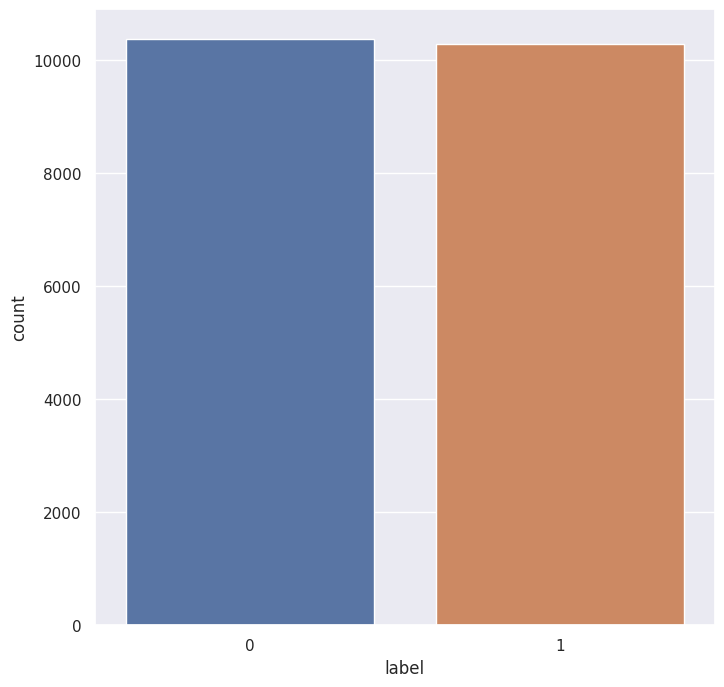

In [ ]:
## Distribution of label data

sns.set_theme(style= 'darkgrid')
sns.countplot(x= 'label', data= train_df)
plt.show()

**Ratio of genuine to reliable almost became 1:1, which shows that dataset is completely balanced.**

#Text Preprocessing
---

**Data Cleaning**

Text Cleaning Steps:
1. Remove special characters
2. Expand contractions
3. Convert to lower-case
4. Word Tokenize
5. Remove Stopwords

In [ ]:
features = list(train_df.describe(include= ['O']).columns) # Features containing textual data
stop_words = stopwords.words('english') # Default English stop words in nltk library


## Function for text cleaning
#-------------------------------------------------------------------------------
def clean_text(text):

  '''Remove special characters and expand contractions'''
  cleaned = re.sub(r'[^a-zA-Z\d\s\']+', '', text)

  words_expanded = []
  for word in cleaned.split():
    try:
      words_expanded.append(contractions.fix(word).lower())
    except:
      print(text)

  cleaned = " ".join(words_expanded)
  return cleaned


## Apply function for text cleaning
#-------------------------------------------------------------------------------
for feat in features:
  train_df[feat] = train_df[feat].apply(clean_text)

In [ ]:
## Function for tokenizing
#-------------------------------------------------------------------------------
def tokenize(x):
  return word_tokenize(x)


## Apply function for tokenizing
#-------------------------------------------------------------------------------
for feat in features:
  train_df[feat] = train_df[feat].apply(tokenize)

In [ ]:
## Function for removal of stop words
#-------------------------------------------------------------------------------
def remove_stopwords(x):
  processed = [word for word in x if word not in stop_words]
  return processed


## Apply function for stop words removal
#-------------------------------------------------------------------------------
for feat in features:
  train_df[feat] = train_df[feat].apply(remove_stopwords)

**Feature Engineering**

In [ ]:
## Joining word sequences of 'text' to a single string
#-------------------------------------------------------------------------------
train_df['joined_text'] = train_df['text'].apply(lambda x: " ".join(x))


## Combining all features and joining to get combined feature variable
#-------------------------------------------------------------------------------
train_df['combined_feat'] = train_df['text'] + train_df['title'] + train_df['author']
train_df['combined_feat'] = train_df['combined_feat'].apply(lambda x: " ".join(x))

## Dependent variable OR Target variable
#-------------------------------------------------------------------------------
target = train_df['label'].values

**Feature Extraction**

Here, I wll try conventional way of using Count Vectorizer (includes bigrams) and TF-IDF trasnformer. Count Vectorizer generates doc-term matrix, which is then trasnformed into normalized tf-idf representation.

In [ ]:
## Instantiating
#-------------------------------------------------------------------------------
count_vectorizer = CountVectorizer(ngram_range= (1,2))
tf_idf_transformer = TfidfTransformer(smooth_idf= False) # smooth_idf = False, to prevent zero division error

## Fit and trasnform data to count vectorizer
#-------------------------------------------------------------------------------
count_vectorizer.fit(train_df['joined_text'].values) # Only feature 'text'selected for training
doc_term_matrix = count_vectorizer.transform(train_df['joined_text'].values)

## Fit and trasnform doc-term matrix to tf-idf transformer
#-------------------------------------------------------------------------------
tf_idf_transformer.fit(doc_term_matrix)
tf_idf_matrix = tf_idf_transformer.transform(doc_term_matrix)

**Train-Test Split**

Default test size (25%) is used.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, target, random_state = 0) # Deafult test size

# Model Training & Validating

I will train the models with default configurations and will select the best-performing model to tune later. All the performance metrics with respect to each model will be saved into seperate dataframe.

In [ ]:
## Dataframe to save the performance metrics wrt each model
#-------------------------------------------------------------------------------
performance_assess = pd.DataFrame(columns= ['Model', 'Accuracy_of_Train', 'Accuracy_of_Test',
                                           'Precision', 'Recall', 'Fl_Score', 'Training_Time_Sec'])


## Models list
#-------------------------------------------------------------------------------
models_list = [LogisticRegression(), MultinomialNB(), RandomForestClassifier(),
               DecisionTreeClassifier()]

track_models = [] # To keep a track of model after training


## Function for model training and recording performance assessment
#-------------------------------------------------------------------------------
def model_building(model, i):
  # Model name
  model_name = type(model).__name__
  print(f'\nTraining model: {model_name}')

  # Record start time
  start_time = time.time()

  # Model Training
  model.fit(X_train, y_train)
  print(f'Completed training of {model_name}')

  # Record completion time
  elapsed_time = time.time() - start_time
  print(f'Time taken to train model: {elapsed_time:.2f}s')

  # Predict on test set
  y_pred = model.predict(X_test)

  # Update performance metrics info in dataframe - 'performance_assess'
  performance_assess.loc[i] = [model_name, model.score(X_train, y_train),
                               model.score(X_test, y_test), precision_score(y_test, y_pred),
                               recall_score(y_test, y_pred), f1_score(y_test, y_pred),
                               f'{elapsed_time:.2f}']
  print(f'Performance assessment of {model_name} model is completed')

  # Keep a track of trained model
  track_models.append(model)

**Train, Test and Evaluate with Default Parameters**

In [ ]:
for i, model in enumerate(models_list):
  model_building(model, i)


Training model: LogisticRegression
Completed training of LogisticRegression
Time taken to train model: 59.02s
Performance assessment of LogisticRegression model is completed

Training model: MultinomialNB
Completed training of MultinomialNB
Time taken to train model: 0.58s
Performance assessment of MultinomialNB model is completed

Training model: RandomForestClassifier
Completed training of RandomForestClassifier
Time taken to train model: 909.52s
Performance assessment of RandomForestClassifier model is completed

Training model: DecisionTreeClassifier
Completed training of DecisionTreeClassifier
Time taken to train model: 388.59s
Performance assessment of DecisionTreeClassifier model is completed


In [ ]:
## Looking at performance assessment dataframe

performance_assess

,Model,Accuracy_of_Train,Accuracy_of_Test,Precision,Recall,Fl_Score,Training_Time_Sec
0,LogisticRegression,0.982660,0.946432,0.927520,0.966562,0.946638,59.02
1,MultinomialNB,0.949333,0.844131,0.997136,0.684894,0.812034,0.58
2,RandomForestClassifier,0.999936,0.908722,0.923140,0.888277,0.905373,909.52
3,DecisionTreeClassifier,0.999936,0.903500,0.894554,0.911094,0.902748,388.59


**Considering All 3 Features (text, title, author) for Training**

Earlier, I trained models only on feature - text ('joined_text'). Now, I will consider all 3 features combined as 'combined_feat' and compare results of both cases.

In [ ]:
## Instantiating
#-------------------------------------------------------------------------------
count_vectorizer = CountVectorizer(ngram_range= (1,2))
tf_idf_transformer = TfidfTransformer(smooth_idf= False)

## Fit and trasnform data to count vectorizer
#-------------------------------------------------------------------------------
doc_term_matrix = count_vectorizer.fit_transform(train_df['combined_feat'].values)

## Fit and trasnform doc-term matrix to tf-idf transformer
#-------------------------------------------------------------------------------
tf_idf_matrix = tf_idf_transformer.fit_transform(doc_term_matrix)

## Train-Test split
#-------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, target, random_state = 0)

In [ ]:
## Train, test & evaluate
#-------------------------------------------------------------------------------
for i, model in enumerate(models_list):
  model_building(model, i)


Training model: LogisticRegression
Completed training of LogisticRegression
Time taken to train model: 82.24s
Performance assessment of LogisticRegression model is completed

Training model: MultinomialNB
Completed training of MultinomialNB
Time taken to train model: 0.60s
Performance assessment of MultinomialNB model is completed

Training model: RandomForestClassifier
Completed training of RandomForestClassifier
Time taken to train model: 657.09s
Performance assessment of RandomForestClassifier model is completed

Training model: DecisionTreeClassifier
Completed training of DecisionTreeClassifier
Time taken to train model: 238.81s
Performance assessment of DecisionTreeClassifier model is completed


In [ ]:
# Looking at performance assessment dataframe

performance_assess

,Model,Accuracy_of_Train,Accuracy_of_Test,Precision,Recall,Fl_Score,Training_Time_Sec
0,LogisticRegression,0.988075,0.961710,0.949731,0.973643,0.961538,82.24
1,MultinomialNB,0.950106,0.851286,0.998314,0.698662,0.822032,0.60
2,RandomForestClassifier,1.000000,0.931155,0.956558,0.900865,0.927877,657.09
3,DecisionTreeClassifier,1.000000,0.977761,0.976069,0.978757,0.977411,238.81


**From the performance assessment results above, it can be seen that the precision of MultinomialNB is the best among all. But f1-score falters because of the poor recall score.**

**So considering all metrics, the best model found to be Logistic Regression.**

# Tuning the Best Model
Further, I will tune the best model (Logistic Regression) using grid search cross validation approach. Since it will take long training time for computation, I will use CuML and CuPy library for GPU based faster computation.

In [ ]:
## Import CuML and CuPy

import cuml
import cupy as cp # Provides GPU-accelerated computing with a NumPy-like interface
from cuml.linear_model import LogisticRegression

# NOTE: RAPID's environment is required, which was already set up at the start of the notebook.

In [ ]:
classifier = LogisticRegression()

## Hyperparameters to be cross validated
#-------------------------------------------------------------------------------
max_iter = [100, 200, 300, 500] # Max no. of iterations to converge
C = [0.1, 1, 10, 50, 100, 150] # Controls the inverse of the regularization strength


# NOTE: Default option is kept for hyperparameters - penalty (regularization)
#       and solver (optimizer), which are 'L2' and 'lbfgs' respectively.


## Instantiate GridSearchCV for hyperparameter tuning parameters
#-------------------------------------------------------------------------------
grid = GridSearchCV(estimator= classifier, param_grid= {'max_iter': max_iter, 'C': C},
                    cv= 5, scoring= 'f1', refit= 'f1', verbose= 2, n_jobs= -1)

In [ ]:
## Result of GridSearchCV
with cp.cuda.Device(0): # To ensures that computations are performed on the GPU
  grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
## Performance

model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))
print('Best Parameters: ', grid_result.best_params_)

Accuracy: 0.9764068845484433
Precision:  0.968266253869969
Recall:  0.98426435877262
f1-score:  0.9761997658993368
Best Parameters:  {'C': 100, 'max_iter': 500}


# Retuning Logistic Regression Classifier

**Attempt 1**

In the last grid, best parameters found were C=100 & max_iter=500. In this attempt, I will see if there are better fits in the values beyond these. I will consider some value lower than and some value higher than C=100, and similarly for max_iter.

In [ ]:
classifier = LogisticRegression()


max_iter = [400, 500, 600]
C = [75, 100, 125]


grid = GridSearchCV(estimator= classifier, param_grid= {'max_iter': max_iter, 'C': C},
                    cv= 5, scoring= 'f1', refit= 'f1', verbose= 2, n_jobs= -1)

In [ ]:
## Result of GridSearchCV
with cp.cuda.Device(0): # To ensures that computations are performed on the GPU
  grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
## Performance

model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))
print('Best Parameters: ', grid_result.best_params_)

Accuracy: 0.9758267259717656
Precision:  0.9682293684618365
Recall:  0.9830841856805664
f1-score:  0.9756002342377513
Best Parameters:  {'C': 125, 'max_iter': 500}


**Attempt 2**

In the previous attempt, best max_iter is still at 500, while best C = 125 resulted into almost same performance metrics.

Now, I will keep constant max_iter=500 and take a range of C from 120 to 150 which increases by a step value of 10.

In [ ]:
classifier = LogisticRegression()


max_iter = [500]
C = [120, 130, 140]


grid = GridSearchCV(estimator= classifier, param_grid= {'max_iter': max_iter, 'C': C},
                    cv= 5, scoring= 'f1', refit= 'f1', verbose= 2, n_jobs= -1)

In [ ]:
## Result of GridSearchCV
with cp.cuda.Device(0): # To ensures that computations are performed on the GPU
  grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
## Performance

model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))
print('Best Parameters: ', grid_result.best_params_)

Accuracy: 0.9762134983562174
Precision:  0.9682539682539683
Recall:  0.9838709677419355
f1-score:  0.976
Best Parameters:  {'C': 120, 'max_iter': 500}


**Attemp 3**

Now, it is clear that best value for C lies in the range of 101 to 120.
On the final attempt, I will consider C = [105, 110, 115, 120] at max_iter=500.

In [ ]:
classifier = LogisticRegression()


max_iter = [500]
C = [105, 110, 115, 120]


grid = GridSearchCV(estimator= classifier, param_grid= {'max_iter': max_iter, 'C': C},
                    cv= 5, scoring= 'f1', refit= 'f1', verbose= 2, n_jobs= -1)

In [ ]:
## Result of GridSearchCV
with cp.cuda.Device(0): # To ensures that computations are performed on the GPU
  grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
## Performance

model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))
print('Best Parameters: ', grid_result.best_params_)

Accuracy: 0.9762134983562174
Precision:  0.9682539682539683
Recall:  0.9838709677419355
f1-score:  0.976
Best Parameters:  {'C': 120, 'max_iter': 500}


**We have finally found our best parameters and associated optimal model.**

# Save the Final Model

In [ ]:
## Saving model to google drive
# Drve is already mounted.
final_model = '/content/drive/MyDrive/FakeNewsDetection/Log_Regr_Optimal.sav'
joblib.dump(model, final_model)

['/content/drive/MyDrive/FakeNewsDetection/Log_Regr_Optimal.sav']

# Further Works

In terms of future work, it is worth considering experimenting with GradientBoost and AdaBoost Classifier. However, to save time, I would like to conclude that the Logistic Regression model performs the best, specifically with parameters max_iter=500 and C=120.